## NLP Homework 8
###Submitted By - Srashti Soni

####Exercise: 1 Accuracy of classifier model with Keras

In [4]:
#importing libraries
from numpy import array
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding, Flatten

In [7]:
#Defining corpus
text = [ 'This is good pizza', 
          'I love Italian pizza', 
          'The best pizza', 
          'nice pizza', 
          'Excellent pizza', 
          'I love pizza', 
          'The pizza was alright', 
          'disgusting pineapple pizza', 
          'not good pizza', 
          'bad pizza', 
          'very bad pizza', 
          'I had better pizza']

In [6]:
# Create class labels for each sentence '1' for positive and '0' for negative.
sentiments = array([1,1,1,1,1,1,1,0,0,0,0,0])

In [9]:
# Extract the vocabulary from the corpus and encode it.
#finding the number of unique words in the corpus
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

all_words = []
for sent in text:
    tokenize_word = word_tokenize(sent)
    for word in tokenize_word:
        all_words.append(word)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
unique_words = set(all_words)
print(len(unique_words))

20


In [12]:
#converting the sentences in corpus to words
vocab_length = 25
embedded_sentences = [one_hot(sent, vocab_length) for sent in text]
print(embedded_sentences )

[[8, 11, 7, 21], [7, 21, 17, 21], [19, 12, 21], [16, 21], [6, 21], [7, 21, 21], [19, 21, 14, 16], [17, 4, 21], [10, 7, 21], [21, 21], [17, 21, 21], [7, 23, 9, 21]]


In [13]:
# Pad the document to the maximum length of the longest sentences tohave uniform length.
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(text, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))

In [14]:
padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')
print(padded_sentences)

[[ 8 11  7 21]
 [ 7 21 17 21]
 [19 12 21  0]
 [16 21  0  0]
 [ 6 21  0  0]
 [ 7 21 21  0]
 [19 21 14 16]
 [17  4 21  0]
 [10  7 21  0]
 [21 21  0  0]
 [17 21 21  0]
 [ 7 23  9 21]]


In [35]:
# Define the model with Keras with Embedding (None, 5.8) as output shape, Flatten (None, 40), and Dense (None, 1)
model = Sequential()
model.add(Embedding(vocab_length, 10, input_length=length_long_sentence))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 4, 10)             250       
                                                                 
 flatten_8 (Flatten)         (None, 40)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 41        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
model.fit(padded_sentences, sentiments, epochs=50, verbose=1)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.6989 - acc: 0.4167
Epoch 2/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6970 - acc: 0.4167
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6951 - acc: 0.4167
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6932 - acc: 0.5833
Epoch 5/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6914 - acc: 0.5833
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6895 - acc: 0.5833
Epoch 7/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6877 - acc: 0.5833
Epoch 8/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6859 - acc: 0.5833
Epoch 9/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6841 - acc: 0.5833
Epoch 10/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6823 - acc: 0.6667
Epoch 11/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6805 - acc: 0

In [31]:
loss, accuracy = model.evaluate(padded_sentences, sentiments, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 91.666669


## What are your conclusions about the model?
The accuracy improved with each epoch and the loss function decreased which means the model is a good fit.

### Exercise 2

In [49]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
from time import time
import re
import string
import os
import emoji
from pprint import pprint
import collections
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
# from sklearn.externals import joblib
import gensim
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
np.random.seed(37)

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20690%20NLP/Data%20files/Tweets.csv')


In [11]:
# Take a look at the first five rows
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


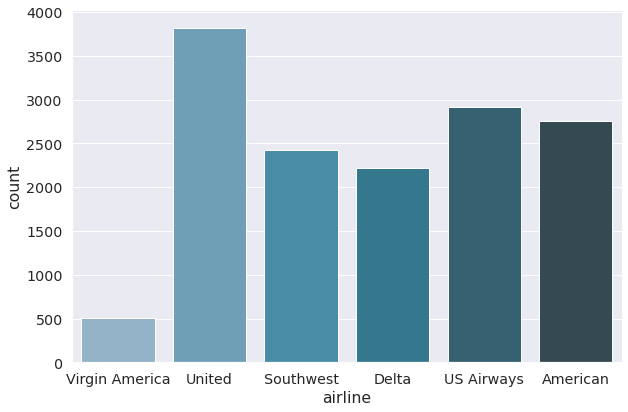

In [12]:
# Plot the shares of airlines mentioned in the data.
sns.factorplot(x="airline", data=df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

In [22]:
# Plot the percentage of positive, negative, and neutral sentiments.


In [14]:
df1=df.groupby(['airline_sentiment','airline']).size().reset_index(name='count')
df1.head()

,airline_sentiment,airline,count
0,negative,American,1960
1,negative,Delta,955
2,negative,Southwest,1186
3,negative,US Airways,2263
4,negative,United,2633


In [15]:
total_cnt=df1['count'].sum()
total_cnt

14640

In [16]:
percnt = []
 
for i in range(df1.shape[0]):
  pct = (df1['count'][i] / total_cnt) * 100
  percnt.append(round(pct, 2))
 
# display percentage
print(percnt)
 
# display data
df1['Percentage'] = percnt
display(df1)

[13.39, 6.52, 8.1, 15.46, 17.98, 1.24, 3.16, 4.94, 4.54, 2.6, 4.76, 1.17, 2.3, 3.72, 3.89, 1.84, 3.36, 1.04]


,airline_sentiment,airline,count,Percentage
0,negative,American,1960,13.39
1,negative,Delta,955,6.52
2,negative,Southwest,1186,8.10
3,negative,US Airways,2263,15.46
4,negative,United,2633,17.98
5,negative,Virgin America,181,1.24
6,neutral,American,463,3.16
7,neutral,Delta,723,4.94
8,neutral,Southwest,664,4.54
9,neutral,US Airways,381,2.60


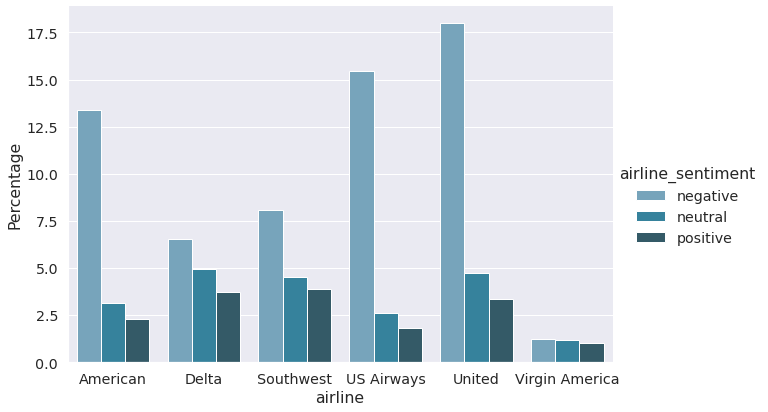

In [17]:
sns.factorplot(x="airline", y= "Percentage",data=df1, kind="bar", hue="airline_sentiment", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

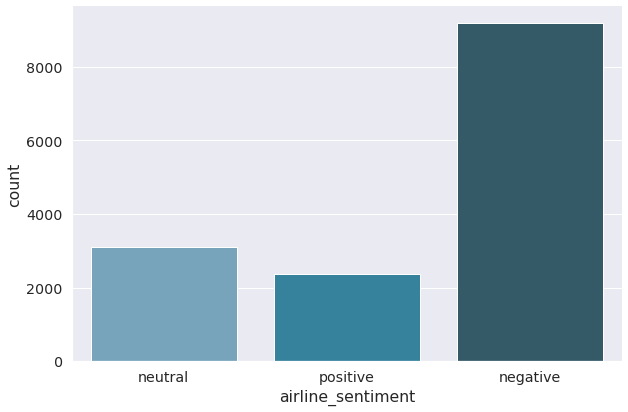

In [24]:
# In a bar chart, show the number of positive, negative, and neutral comments by airline.
sns.factorplot(x="airline_sentiment", data=df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

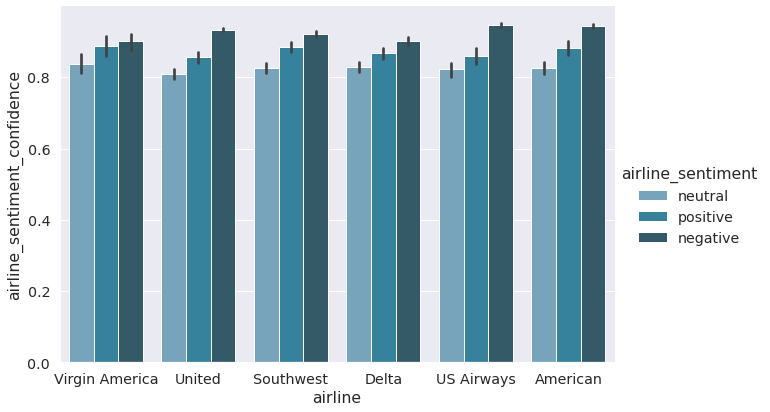

In [25]:
# Using Seaborn, show airlines' sentiment confidence.
sns.factorplot(x="airline", y = "airline_sentiment_confidence",data=df, kind="bar", hue="airline_sentiment", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

In [26]:
# Define the features and labels.
df = df.reindex(np.random.permutation(df.index))
df = df[['text', 'airline_sentiment']]

In [27]:
df.head()

,text,airline_sentiment
12614,"@AmericanAir $600 Late Flightr, 2 complete itinerary changes, and lost work and time, but yeah ""I"" got it rebooked",negative
2774,@united Existing reservation is fine. I was talking about no longer having an 0600 CMH-ORD option. 0638 gets me in too Late Flight.,negative
556,@united thanks again for your concern. I will contact customer care upon our return from Australia.,neutral
10103,@USAirways I packed a carry on for a reason. Thanks for making me check it. I hoped for better customer service in CLE also. #nothappy,negative
7991,@JetBlue flight 691 from bos to Tampa takeoff 40 min Late Flight,negative


In [28]:
sentiment_ordering = ['negative', 'neutral', 'positive']

df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: sentiment_ordering.index(x))

In [29]:
df.head()

,text,airline_sentiment
12614,"@AmericanAir $600 Late Flightr, 2 complete itinerary changes, and lost work and time, but yeah ""I"" got it rebooked",0
2774,@united Existing reservation is fine. I was talking about no longer having an 0600 CMH-ORD option. 0638 gets me in too Late Flight.,0
556,@united thanks again for your concern. I will contact customer care upon our return from Australia.,1
10103,@USAirways I packed a carry on for a reason. Thanks for making me check it. I hoped for better customer service in CLE also. #nothappy,0
7991,@JetBlue flight 691 from bos to Tampa takeoff 40 min Late Flight,0


In [30]:
# pip install emoji -q

     |████████████████████████████████| 216 kB 5.3 MB/s 


In [32]:
ps = PorterStemmer()

def process_tweet(tweet):
    new_tweet = tweet.lower()
    new_tweet = re.sub(r'@\w+', '', new_tweet) # Remove @s
    new_tweet = re.sub(r'#', '', new_tweet) # Remove hashtags
    new_tweet = re.sub(r':', ' ', emoji.demojize(new_tweet)) # Turn emojis into words
    new_tweet = re.sub(r'http\S+', '',new_tweet) # Remove URLs
    new_tweet = re.sub(r'\$\S+', 'dollar', new_tweet) # Change dollar amounts to dollar
    new_tweet = re.sub(r'[^a-z0-9\s]', '', new_tweet) # Remove punctuation
    new_tweet = re.sub(r'[0-9]+', 'number', new_tweet) # Change number values to number
    new_tweet = new_tweet.split(" ")
    new_tweet = list(map(lambda x: ps.stem(x), new_tweet)) # Stemming the words
    new_tweet = list(map(lambda x: x.strip(), new_tweet)) # Stripping whitespace from the words
    if '' in new_tweet:
        new_tweet.remove('')
    return new_tweet

In [33]:
tweets = df['text'].apply(process_tweet)
labels = np.array(df['airline_sentiment'])

In [34]:
tweets

12614    [dollar, late, flightr, number, complet, itinerari, chang, and, lost, work, and, time, but, yeah, i, got, it, rebook]                  
2774     [exist, reserv, is, fine, i, wa, talk, about, no, longer, have, an, number, cmhord, option, number, get, me, in, too, late, flight]    
556      [thank, again, for, your, concern, i, will, contact, custom, care, upon, our, return, from, australia]                                 
10103    [i, pack, a, carri, on, for, a, reason, thank, for, make, me, check, it, i, hope, for, better, custom, servic, in, cle, also, nothappi]
7991     [flight, number, from, bo, to, tampa, takeoff, number, min, late, flight]                                                              
                                           ...                                                                                                  
8027     [i, lost, a, day, at, the, airport, and, off, my, trip, i, should, be, compens, for, the, inconveni]                     

In [36]:
vocabulary = set()

for tweet in tweets:
    for word in tweet:
        if word not in vocabulary:
            vocabulary.add(word)

vocab_length = len(vocabulary)


max_seq_length = 0

for tweet in tweets:
    if len(tweet) > max_seq_length:
        max_seq_length = len(tweet)

print("Vocabulary length:", vocab_length)
print("Maximum sequence length:", max_seq_length)

Vocabulary length: 11351
Maximum sequence length: 90


In [39]:
tokenizer = Tokenizer(num_words=vocab_length)
tokenizer.fit_on_texts(tweets)

sequences = tokenizer.texts_to_sequences(tweets)

word_index = tokenizer.word_index

model_inputs = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

In [40]:
model_inputs

array([[111, 100, 244, ...,   0,   0,   0],
       [899, 162,  13, ...,   0,   0,   0],
       [ 21, 112,   9, ...,   0,   0,   0],
       ...,
       [ 76, 283,  18, ...,   0,   0,   0],
       [220,   0,   0, ...,   0,   0,   0],
       [ 47, 241,   0, ...,   0,   0,   0]], dtype=int32)

In [41]:
# Create a train and test (20%) dataset
X_train, X_test, y_train, y_test = train_test_split(model_inputs, labels, test_size=0.2, random_state=42)

In [43]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [44]:
y_pred = model.predict(X_test)

In [47]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.6950136612021858


In [50]:
confusion_matrix(y_test, y_pred)

array([[1770,   86,   12],
       [ 391,  180,   25],
       [ 325,   54,   85]])

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81      1868
           1       0.56      0.30      0.39       596
           2       0.70      0.18      0.29       464

    accuracy                           0.70      2928
   macro avg       0.66      0.48      0.50      2928
weighted avg       0.68      0.70      0.64      2928



The accuracy of the model is just 70% which means Random Forest Classifier is an average model and not the best fit. 